# Here the first we install libraries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# To read that given dataset we are using pandas library

In [17]:
df= pd.read_csv("Sample - Superstore.csv", encoding="latin1")

# The targetted Columns are order date and sales

In [18]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df = df.sort_values('Order Date')

In [21]:
daily_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
daily_sales.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


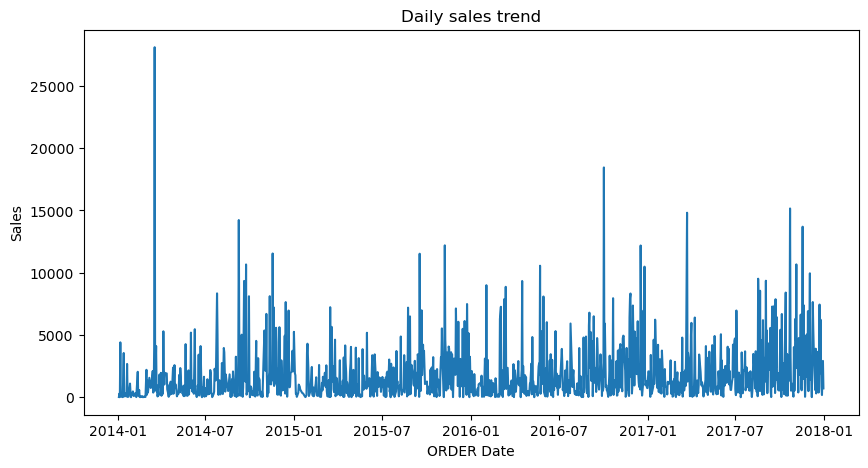

In [23]:
plt.figure(figsize=(10,5))
plt.plot(daily_sales['Order Date'], daily_sales['Sales'])
plt.title("Daily sales trend")
plt.xlabel("ORDER Date")
plt.ylabel("Sales")
plt.show()

In [26]:
daily_sales['year'] = daily_sales['Order Date'].dt.year
daily_sales['month'] = daily_sales['Order Date'].dt.month
daily_sales['day'] = daily_sales['Order Date'].dt.day
daily_sales['day_of_week'] = daily_sales['Order Date'].dt.dayofweek
daily_sales['lag_1'] = daily_sales['Sales'].shift(1)
daily_sales = daily_sales.dropna()

In [29]:
X= daily_sales.drop(['Sales', 'Order Date'], axis=1)
y= daily_sales['Sales']

# here we are training historical data of sales and most recent 30 days data for testing


In [30]:
X_train, X_test = X[:-30], X[-30:]
y_train, y_test = y[:-30], y[-30:]

# using Linear Regression for for prediction the sales pattern

In [31]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,y_train)
y_pred= model.predict(X_test)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae= mean_absolute_error(y_test, y_pred)
rmse= np.sqrt(mean_squared_error(y_test, y_pred))
print("MAE:", mae)
print("RMSE:", rmse)

MAE: 1946.6667455796971
RMSE: 2379.1217046585084


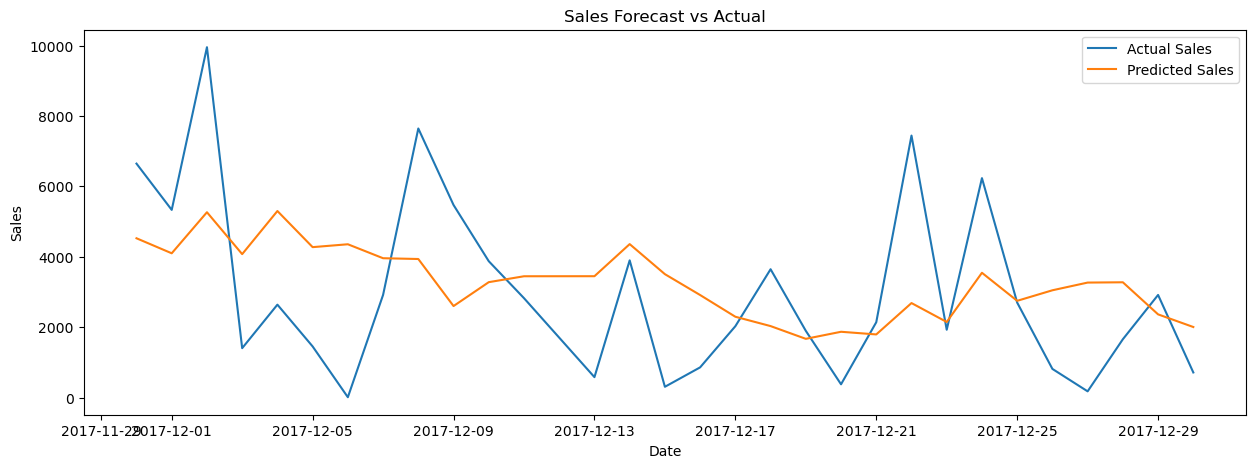

In [43]:
plt.figure(figsize=(15,5))
plt.plot(daily_sales['Order Date'][-30:], y_test, label="Actual Sales")
plt.plot(daily_sales['Order Date'][-30:], y_pred, label="Predicted Sales")
plt.legend()
plt.title("Sales Forecast vs Actual")
plt.xlabel("Date")
plt.ylabel("Sales")

plt.show()

In [40]:
print("Graph Explanation:")
print("- The graph compares actual sales with predicted sales from the last 30 days.")
print("- The closer the two lines, the better the model performance.")
print("- the Small gaps between lines indicates good prediction accuracy.")
print("- Larger gaps shows sudden changes in customer demand.")

Graph Explanation:
- The graph compares actual sales with predicted sales for the last 30 days.
- The closer the two lines, the better the model performance.
- Small gaps between lines indicate good prediction accuracy.
- Larger gaps show sudden changes in customer demand.
